<a href="https://colab.research.google.com/github/Oskarino/Lab1_PTD/blob/main/Lab1_PTD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

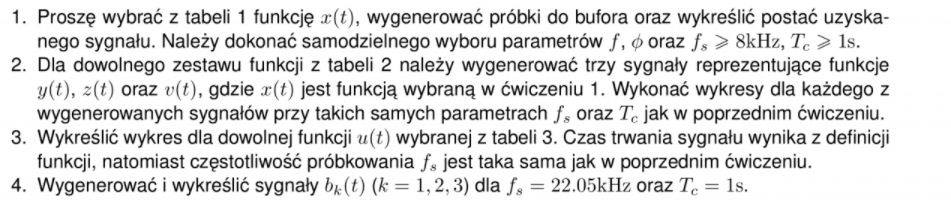

##Zad 1

In [1]:
import matplotlib.pyplot as plt
import math
from math import sin, cos, pi, sqrt, log

In [2]:
#czestotliwosc probkowania
f_s = 8000

#przesuniecie w fazie
phi = pi/120
#funkcja z tabeli
funkcja_x = lambda t: sin(2*pi*f_s*t*cos(3*pi*t) + t*phi) 

#sekundy
T = 2

def generate_signal(funkcja, f_s, T):
  ''' Funkcja generujaca sygnal dla funkcji: funkcja, czestotliwosci: f_s i czasu trwania T'''
  return [funkcja(n/f_s) for n in range(int(T*f_s))]

Text(0.5, 1.0, 'Sygnal x  z tabeli')

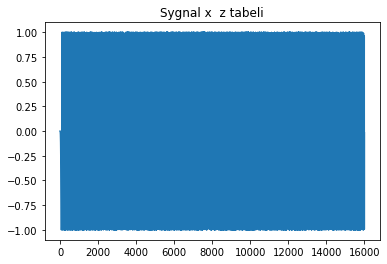

In [3]:
#wygererowany sygnal
x = generate_signal(funkcja_x, f_s, T)
plt.plot(range(T*f_s), x)
plt.title("Sygnal x  z tabeli")

Text(0.5, 1.0, 'Sygnal dla pierwszych 1000 wartosci')

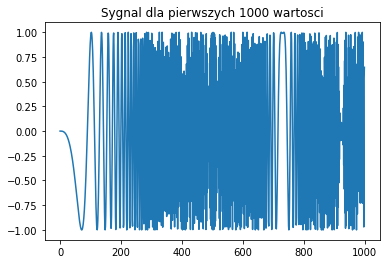

In [4]:
plt.plot(range(1000), x[:1000])
plt.title("Sygnal dla pierwszych 1000 wartosci")

## Zad 2

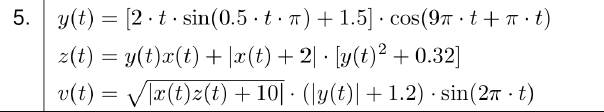

Text(0.5, 1.0, 'Sygnal y z tabeli')

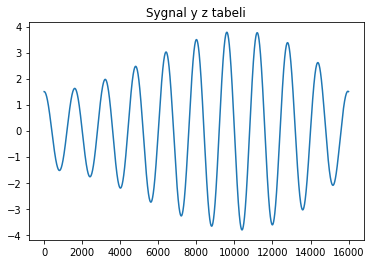

In [5]:
#funkcja y z tabeli
funkcja_y = lambda t: (2*t*sin(0.5*t*pi) + 1.5)*cos(9*pi*t+pi*t)
y = generate_signal(funkcja_y, f_s, T)
plt.plot(range(len(y)), y)
plt.title("Sygnal y z tabeli")

Text(0.5, 1.0, 'Sygnal z z tabeli')

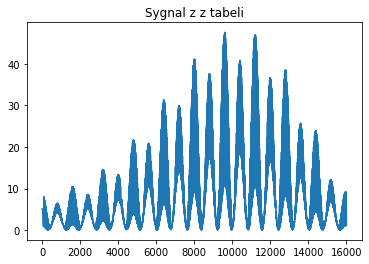

In [6]:
#funkcja z z tabeli
funkcja_z = lambda t: funkcja_x(t)*funkcja_y(t)+ abs(funkcja_x(t)+2)*(funkcja_y(t)**2 + 0.32)
z = generate_signal(funkcja_z, f_s, T)
plt.plot(range(len(z)), z)
plt.title("Sygnal z z tabeli")

Text(0.5, 1.0, 'Sygnal v z tabeli')

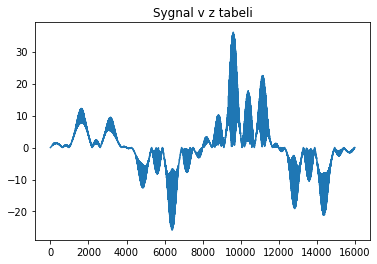

In [7]:
#funkcja v z tabeli
funkcja_v = lambda t: sqrt(abs(funkcja_x(t)*funkcja_z(t)+10))*(abs(funkcja_y(t) + 1.2))*sin(2*pi*t)
v = generate_signal(funkcja_v, f_s, T)
plt.plot(range(len(v)), v)
plt.title("Sygnal v z tabeli")

## Zad 3

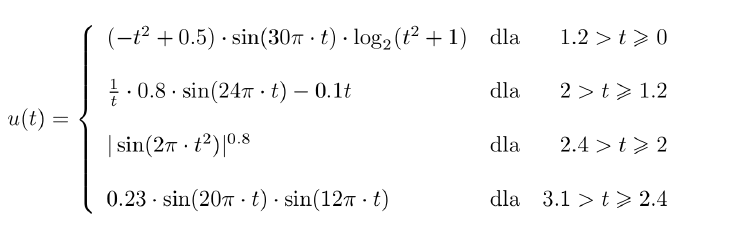

Text(0.5, 1.0, 'Sygnal u z tabeli')

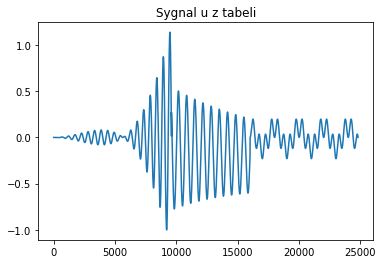

In [8]:
#czas trwania sygnalu wynikajacy ze wzrou funkcji u
T_u = 3.1

def funkcja_u(t):
  '''Definicja funkcji u na przedzialach'''
  if t<0 or t >= 3.1:
    raise Exception("Wrong time!!")
  if t < 1.2:
    return (-t**2 + 0.5)*sin(30*pi*t)*log(t**2+1,2)
  if t < 2:
    return (1/t)*0.8*sin(24*pi*t)-0.1*t
  if t < 2.4:
    abs(sin(2*pi*t*2))**0.8
  if t < 3.1:
    return 0.23*sin(20*pi*t)*sin(12*pi*t)


#funkcja u z tabeli
u = generate_signal(funkcja_u, f_s, T_u)
plt.plot(range(len(u)), u)
plt.title("Sygnal u z tabeli")

## Zad 4

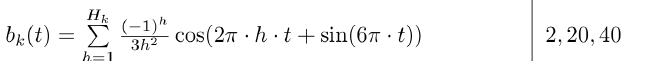

Text(0.5, 1.0, 'Wspolny wykres dla sygnalow b1, b2, b3')

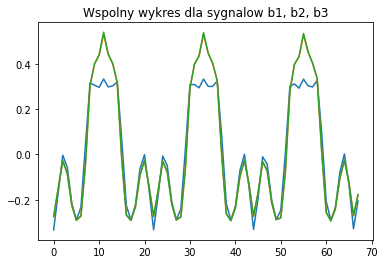

In [9]:
#czestotliosc dla b1, b2, b3
f_s = 22.05
#czas dla b1, b2, b3
T = 1

from functools import partial


def funkcja_b_k(t, k):
  '''definicja funkcji b_k dla k=1,2,3'''
  H = [2,20,40]
  return sum([(cos( 2*pi *h*t + sin(6*pi*t)))*((-1)**h)/(3*h**2) for h in range(1, H[k-1])])


#sygnaly b1 do b3
b_1 = generate_signal(partial(funkcja_b_k,k=1), f_s, T_u)
b_2 = generate_signal(partial(funkcja_b_k,k=2), f_s, T_u)
b_3 = generate_signal(partial(funkcja_b_k,k=3), f_s, T_u)

plt.plot(range(len(b_1)), b_1)
plt.plot(range(len(b_2)), b_2)
plt.plot(range(len(b_3)), b_3)
plt.title("Wspolny wykres dla sygnalow b1, b2, b3")
